In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dftrain = pd.read_csv('train.csv')

In [3]:
dftest  = pd.read_csv('test.csv')

In [4]:
print("The shape of the traning dataset is:", dftrain.shape)
print('-'*50)
print("The shape of the testing dataset is:", dftest.shape)

The shape of the traning dataset is: (414, 8)
--------------------------------------------------
The shape of the testing dataset is: (276, 7)


In [5]:
print(dftrain.head())
print('-'*55)
print(dftest.head())


   id  gravity    ph  osmo  cond  urea  calc  target
0   0    1.013  6.19   443  14.8   124  1.45       0
1   1    1.025  5.40   703  23.6   394  4.18       0
2   2    1.009  6.13   371  24.5   159  9.04       0
3   3    1.021  4.91   442  20.8   398  6.63       1
4   4    1.021  5.53   874  17.8   385  2.21       1
-------------------------------------------------------
    id  gravity    ph  osmo  cond  urea   calc
0  414    1.017  5.24   345  11.5   152   1.16
1  415    1.020  5.68   874  29.0   385   3.46
2  416    1.024  5.36   698  19.5   354  13.00
3  417    1.020  5.33   668  25.3   252   3.46
4  418    1.011  5.87   567  29.0   457   2.36


In [6]:
print(dftrain.describe())

               id     gravity          ph         osmo        cond  \
count  414.000000  414.000000  414.000000   414.000000  414.000000   
mean   206.500000    1.017894    5.955459   651.545894   21.437923   
std    119.655756    0.006675    0.642260   234.676567    7.514750   
min      0.000000    1.005000    4.760000   187.000000    5.100000   
25%    103.250000    1.012000    5.530000   455.250000   15.500000   
50%    206.500000    1.018000    5.740000   679.500000   22.200000   
75%    309.750000    1.022000    6.280000   840.000000   27.600000   
max    413.000000    1.040000    7.940000  1236.000000   38.000000   

             urea        calc      target  
count  414.000000  414.000000  414.000000  
mean   278.657005    4.114638    0.444444  
std    136.442249    3.217641    0.497505  
min     10.000000    0.170000    0.000000  
25%    170.000000    1.450000    0.000000  
50%    277.000000    3.130000    0.000000  
75%    385.000000    6.630000    1.000000  
max    620.000000

In [7]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [8]:
print("The total null values in the training set are: ", dftrain.isnull().sum())
print('*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*')
print("The total null values in the testing set are: ", dftest.isnull().sum())

The total null values in the training set are:  id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64
*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
The total null values in the testing set are:  id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
dtype: int64


In [10]:
# drop the id column because we dont need it

dftrain = dftrain.drop(['id'], axis = True)
dftest  = dftest.drop(['id'], axis = True)

In [11]:
dftrain.head()

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1


0    230
1    184
Name: target, dtype: int64


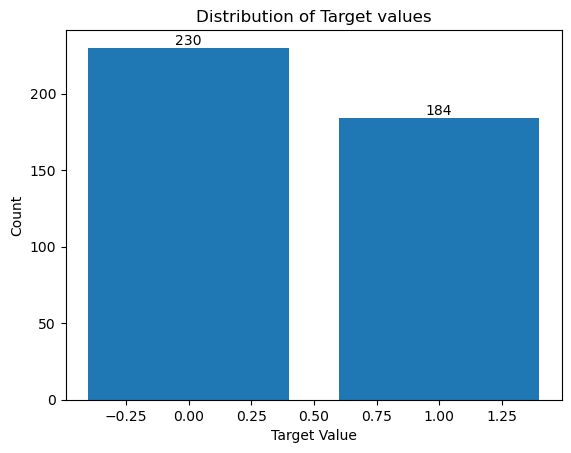

In [12]:
import matplotlib.pyplot as plt

print(dftrain['target'].value_counts())

counts = dftrain['target'].value_counts()
plt.bar(counts.index, counts.values)
plt.xlabel("Target Value")
plt.ylabel("Count")
plt.title("Distribution of Target values")

for i, v in enumerate(counts.values):
    plt.text(i, v, str(v), ha = 'center', va = 'bottom')
plt.show()

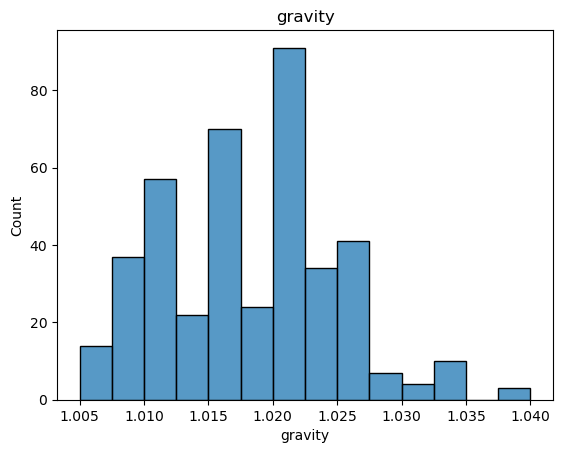

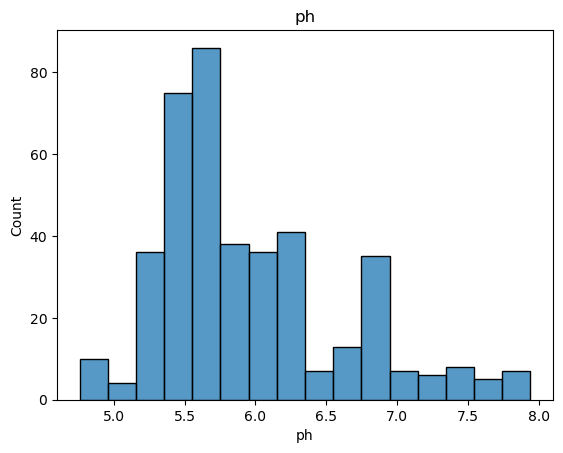

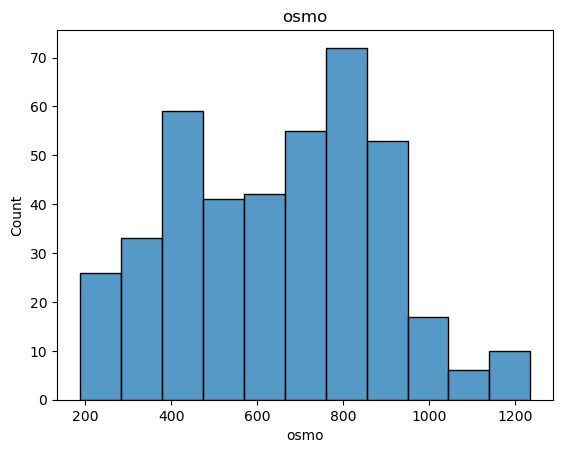

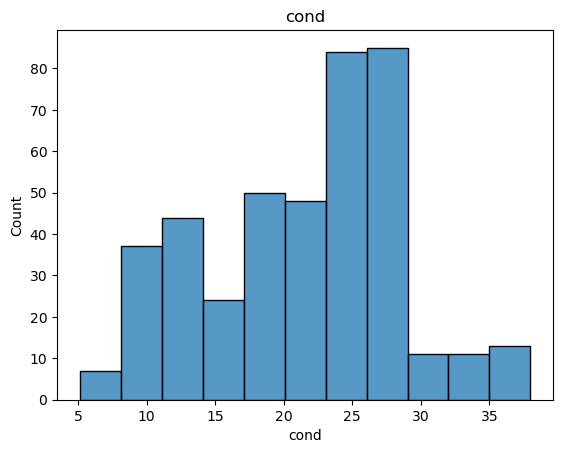

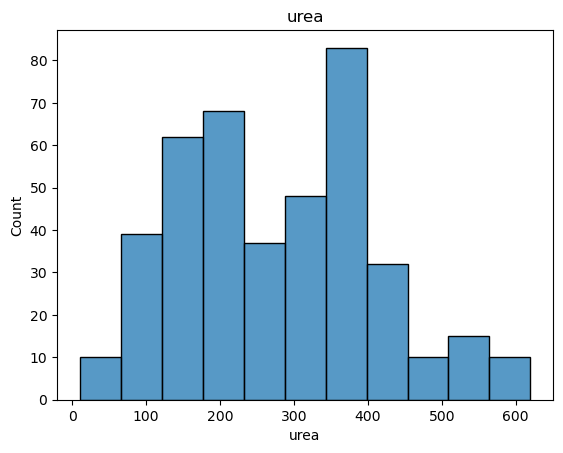

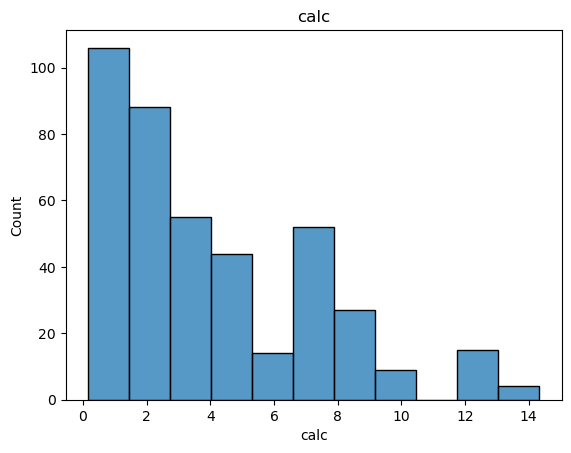

In [13]:
# Distribution of every single features

import seaborn as sns

def plot_histograms(dftrain):
    columns = dftrain.columns.tolist()
    columns.remove('target')
    
    for col in columns:
        sns.histplot(dftrain[col])
        plt.title(col)
        plt.show()
plot_histograms(dftrain)

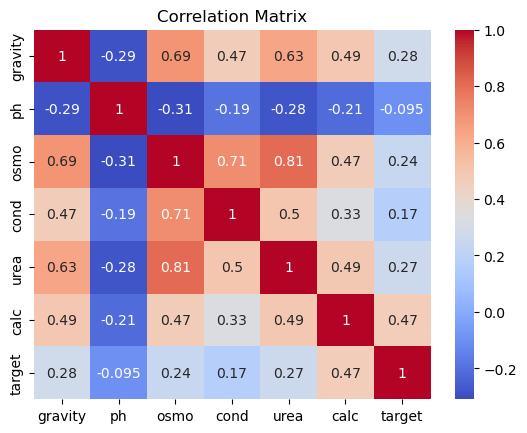

In [15]:
# Corr

import warnings
warnings.filterwarnings('ignore')
corr_matrix = dftrain.corr()
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

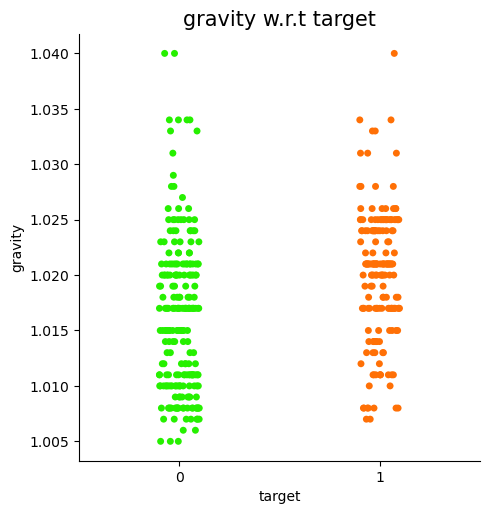

<Figure size 1000x600 with 0 Axes>

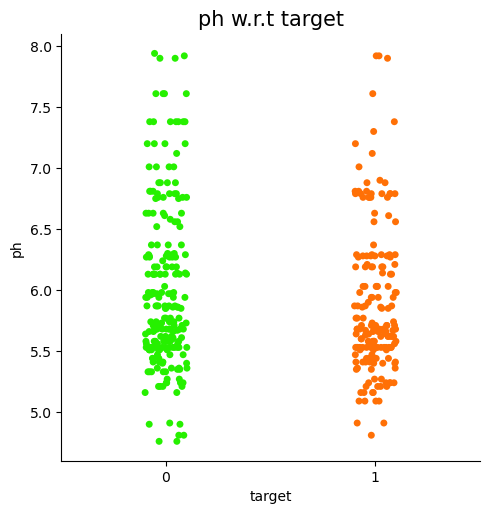

<Figure size 1000x600 with 0 Axes>

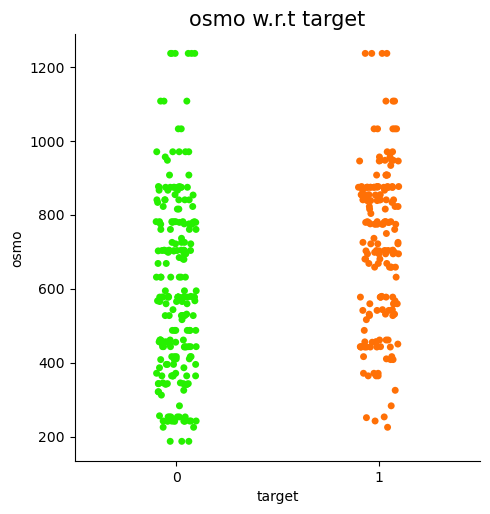

<Figure size 1000x600 with 0 Axes>

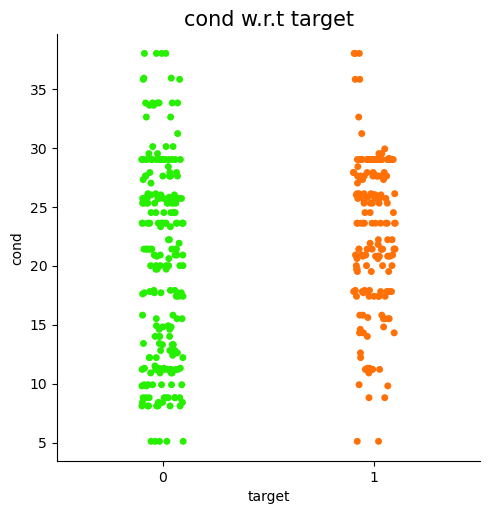

<Figure size 1000x600 with 0 Axes>

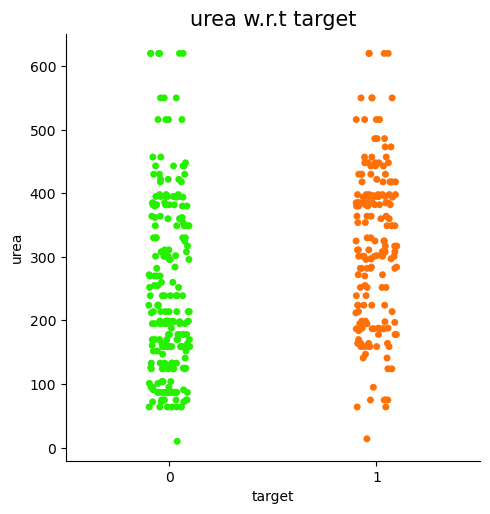

<Figure size 1000x600 with 0 Axes>

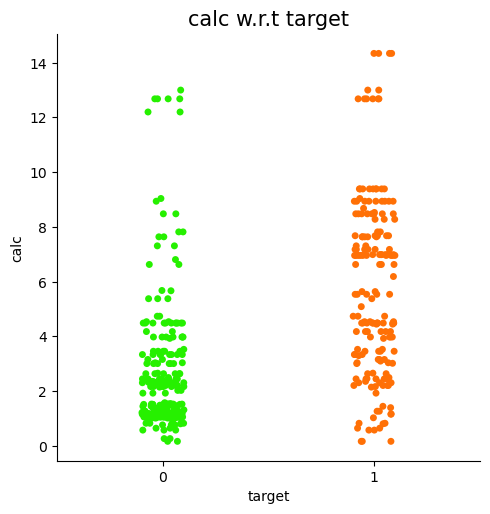

In [16]:
feature_cols = [col for col in dftrain.columns if col != 'target']

for feature in feature_cols:
    plt.figure(figsize=(10,6))
    sns.catplot(data = dftrain, x = 'target', y = feature, palette = 'gist_ncar')
    plt.title(f'{feature} w.r.t target', size = 15)
    plt.show()

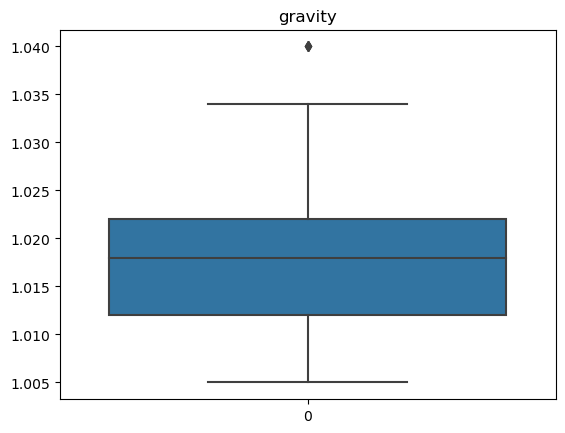

Number of outliers in gravity: 3


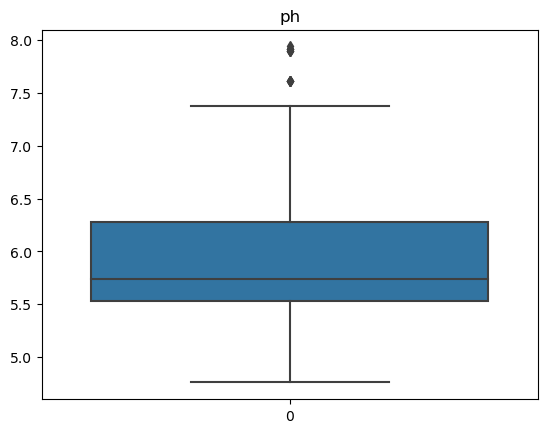

Number of outliers in ph: 12


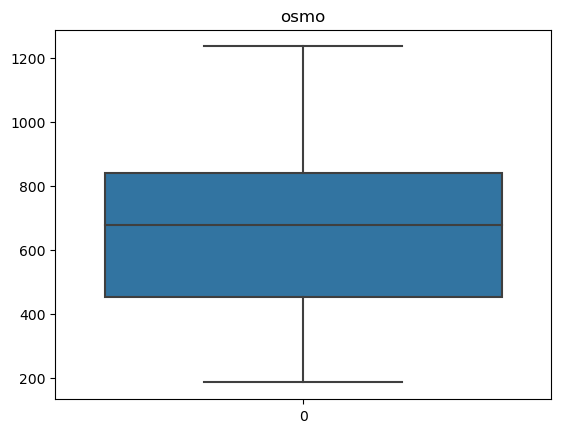

Number of outliers in osmo: 0


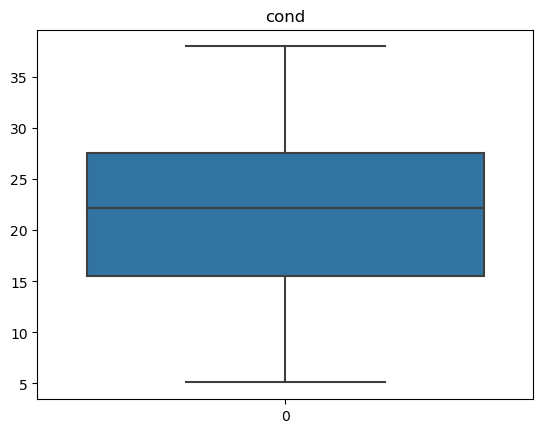

Number of outliers in cond: 0


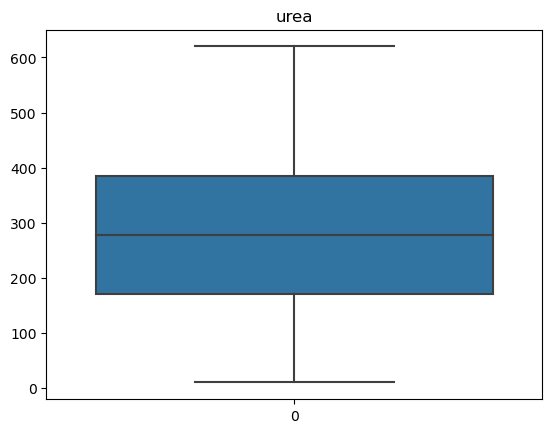

Number of outliers in urea: 0


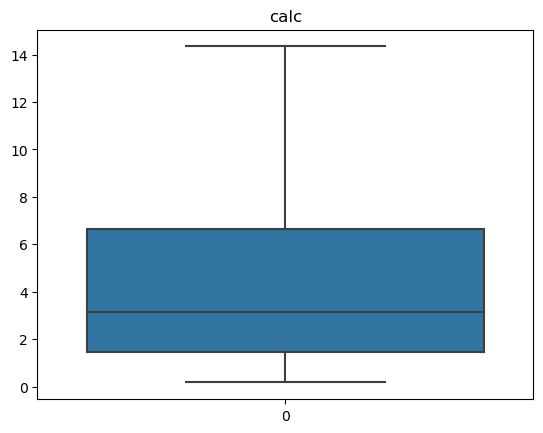

Number of outliers in calc: 0
Outliers:
None


In [17]:
# Plotting the boxplots to check the outiers in the dataset 

def detect_outliers(dftrain):
    # Get all the column names
    columns = dftrain.columns.tolist()
    
    # Remove the target column (assuming it's the last column)
    columns.remove('target')
    
    # Detect and plot outliers using boxplots
    for col in columns:
        sns.boxplot(dftrain[col])
        plt.title(col)
        plt.show()

        # Calculate the upper and lower bounds for outliers using IQR
        Q1 = dftrain[col].quantile(0.25)
        Q3 = dftrain[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - (1.5 * IQR)
        upper_bound = Q3 + (1.5 * IQR)
        
        # Print the number of outliers detected
        num_outliers = len(dftrain[(dftrain[col] < lower_bound) | (dftrain[col] > upper_bound)])
        print(f"Number of outliers in {col}: {num_outliers}")

outliers = detect_outliers(dftrain)
print("Outliers:")
print(outliers)

In [18]:
# Random forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
# Model Training

from sklearn.model_selection import train_test_split
X = dftrain.drop(['target'], axis=1)
y = dftrain['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.90, random_state = 19)

Rfc_model = RandomForestClassifier(n_estimators = 100)

In [20]:
Rfc_model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = Rfc_model.predict(X_test)

[[17  3]
 [11 11]]


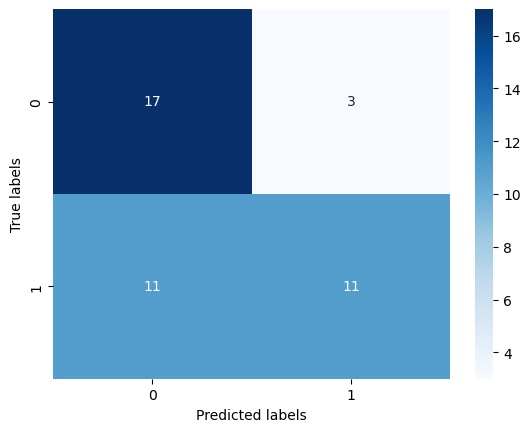

In [22]:
# Evaluate the model performance

cm = confusion_matrix(y_test, y_pred)
print(cm)

sns.heatmap(cm,annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [23]:
# Accuracy

accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the Random forest classifier model is:', accuracy*100)
print('-'*50)
print('classification_report:\n', classification_report(y_test, y_pred))

The accuracy of the Random forest classifier model is: 66.66666666666666
--------------------------------------------------
classification_report:
               precision    recall  f1-score   support

           0       0.61      0.85      0.71        20
           1       0.79      0.50      0.61        22

    accuracy                           0.67        42
   macro avg       0.70      0.68      0.66        42
weighted avg       0.70      0.67      0.66        42



In [24]:
result = Rfc_model.predict(dftest)
result

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1], dtype=int64)

In [26]:
sample_submission = pd.read_csv('sample_submission.csv')

In [28]:
sample_submission['target'] = result
sample_submission

,id,target
0,414,0
1,415,1
2,416,1
3,417,1
4,418,0
...,...,...
271,685,1
272,686,0
273,687,1
274,688,0


In [30]:
sample_submission.to_csv('submission_RF.csv',index=False)